In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('house_data/train.csv')
test_data = pd.read_csv('house_data/test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('Training shape: {}x{}'.format(*train_data.shape))
print('Test shape: {}x{}'.format(*test_data.shape))

Training shape: 1460x81
Test shape: 1459x80


In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

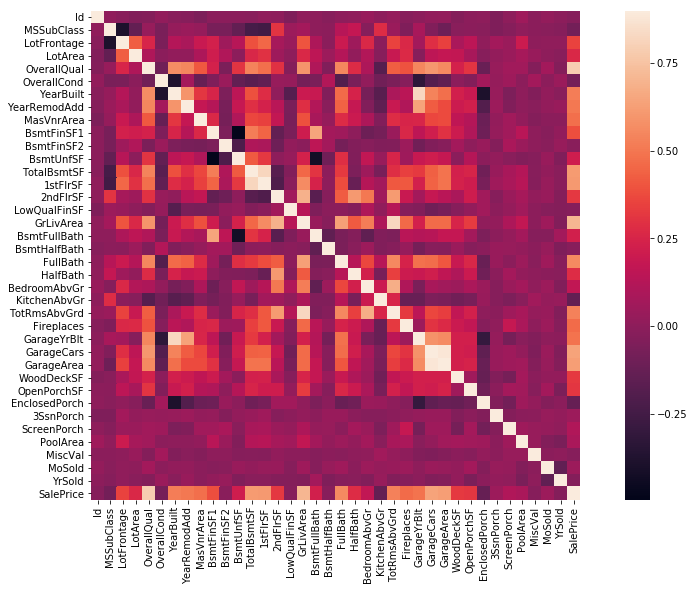

In [7]:
corr_mtx = train_data.corr()
fix, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_mtx, vmax=0.9, square = True)

In [8]:
# columns that have the highest correlation with `SalePrice`
cols = corr_mtx.nlargest(11, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

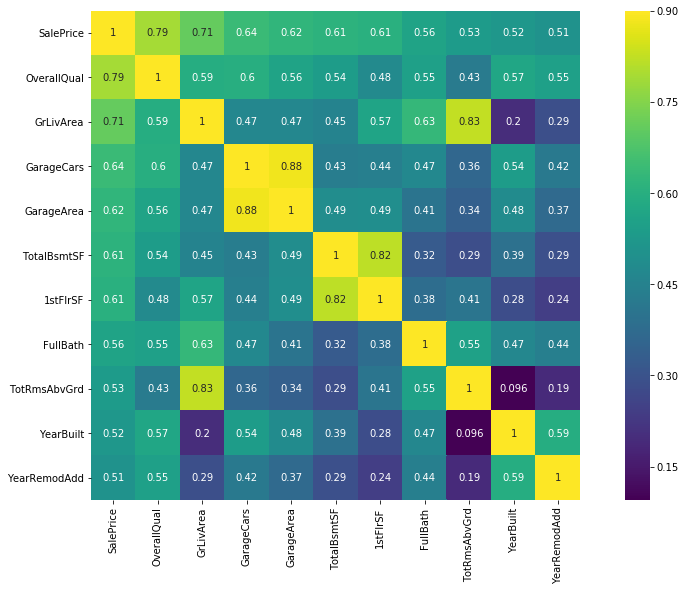

In [9]:
corr_ = np.corrcoef(train_data[cols].values.T) # T in order to get correlation between columns
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(
    corr_, vmax=0.9, square=True, annot=True, annot_kws={'size': 10},
    xticklabels=cols, yticklabels=cols, cmap='viridis', linecolor='white'
)

# Correlation points
As the correlation matrix shows, there are colums which bring duplicated information.
`TotRmsAbvGrd` can be represented by `GrLivArea` in 83%
`GarageArea` and `GarageCars` are also correlated and the resemblance level is 88%
`1stFlrSF` is similar to `TotalBsmSF` in 82%
Thus, we can drop three columns; `TotRmsAbvGrd`, `GarageCars`, `TotalBsmtSF`

In [10]:
train_data = train_data[cols]

In [11]:
train_data = train_data.drop(labels=['TotRmsAbvGrd', 'GarageCars', 'TotalBsmtSF'], axis=1)
train_data.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
0,208500,7,1710,548,856,2,2003,2003
1,181500,6,1262,460,1262,2,1976,1976
2,223500,7,1786,608,920,2,2001,2002
3,140000,7,1717,642,961,1,1915,1970
4,250000,8,2198,836,1145,2,2000,2000


(array([  1.,   0.,   1.,   0.,   0.,   1.,   0.,   9.,   6.,   6.,   5.,
          5.,  21.,  19.,  30.,  30.,  53.,  67.,  94.,  88.,  82.,  86.,
         88.,  83.,  93.,  72.,  63.,  71.,  55.,  69.,  57.,  55.,  55.,
         30.,  14.,  17.,  14.,   8.]),
 array([ 5.81114099,  5.86144459,  5.91174818,  5.96205177,  6.01235536,
         6.06265896,  6.11296255,  6.16326614,  6.21356973,  6.26387333,
         6.31417692,  6.36448051,  6.41478411,  6.4650877 ,  6.51539129,
         6.56569488,  6.61599848,  6.66630207,  6.71660566,  6.76690925,
         6.81721285,  6.86751644,  6.91782003,  6.96812363,  7.01842722,
         7.06873081,  7.1190344 ,  7.169338  ,  7.21964159,  7.26994518,
         7.32024877,  7.37055237,  7.42085596,  7.47115955,  7.52146315,
         7.57176674,  7.62207033,  7.67237392,  7.72267752]),
 <a list of 38 Patch objects>)

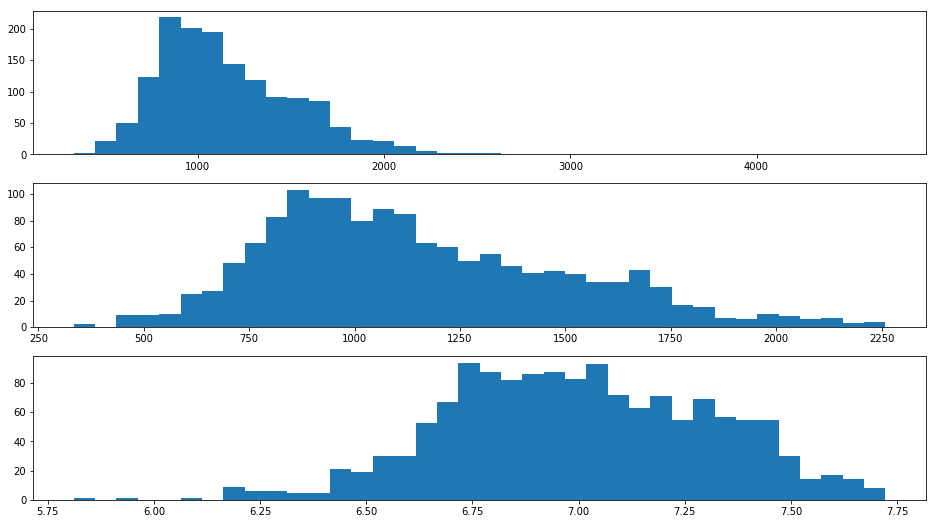

In [12]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(3, 1, figsize=(16, 9))
n_samples = len(train_data)
n_bins = int(np.sqrt(n_samples))
ax_1.hist(train_data['1stFlrSF'], bins=n_bins)
firstFlrSF = train_data['1stFlrSF']
mu_1stFlrSF = np.mean(firstFlrSF)
std_1stFlrSF = np.std(firstFlrSF)
firstFlrSF = firstFlrSF[firstFlrSF < (mu_1stFlrSF + 3*std_1stFlrSF)]
firstFlrSF = firstFlrSF[firstFlrSF > (mu_1stFlrSF - 3*std_1stFlrSF)]
ax_2.hist(firstFlrSF, bins=n_bins)
ax_3.hist(np.log(firstFlrSF), bins=n_bins)

(array([  8.,   0.,   5.,   6.,   5.,  18.,  20.,  50.,  45.,  38.,  42.,
         51.,  54.,  59.,  66.,  59.,  70.,  70.,  86.,  84.,  80.,  96.,
         88.,  67.,  55.,  46.,  42.,  29.,  26.,  21.,  18.,  21.,   7.,
          6.,   4.,   5.,   2.,   3.]),
 array([ 6.40522847,  6.45235828,  6.49948809,  6.5466179 ,  6.5937477 ,
         6.64087751,  6.68800732,  6.73513712,  6.78226693,  6.82939674,
         6.87652654,  6.92365635,  6.97078616,  7.01791597,  7.06504577,
         7.11217558,  7.15930539,  7.20643519,  7.253565  ,  7.30069481,
         7.34782462,  7.39495442,  7.44208423,  7.48921404,  7.53634384,
         7.58347365,  7.63060346,  7.67773326,  7.72486307,  7.77199288,
         7.81912269,  7.86625249,  7.9133823 ,  7.96051211,  8.00764191,
         8.05477172,  8.10190153,  8.14903134,  8.19616114]),
 <a list of 38 Patch objects>)

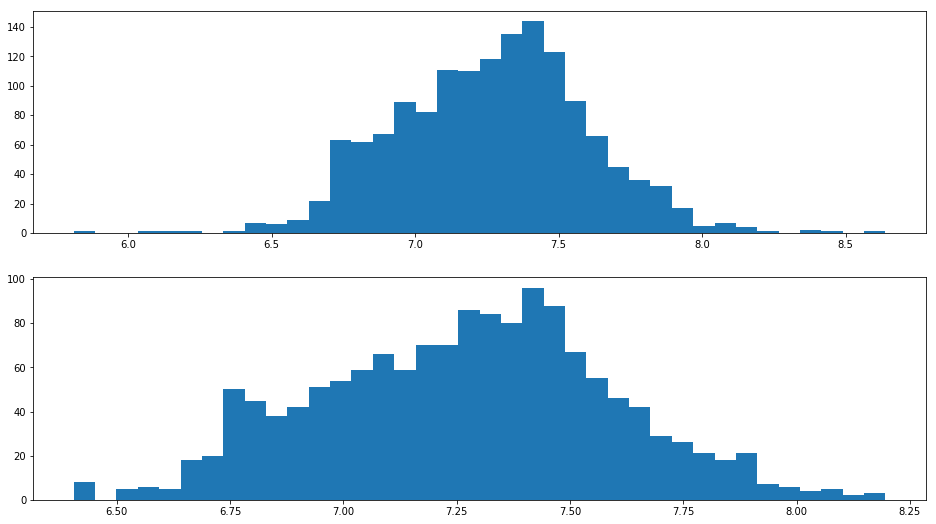

In [13]:
grLivArea = np.log(train_data['GrLivArea']+1e-5)
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16, 9))
ax_1.hist(grLivArea, bins=n_bins)
mu_grLivArea = np.mean(grLivArea)
std_grLivArea = np.std(grLivArea)
grLivArea = grLivArea[grLivArea < (mu_grLivArea + 3*std_grLivArea)]
grLivArea = grLivArea[grLivArea > (mu_grLivArea - 3*std_grLivArea)]
ax_2.hist(grLivArea, bins=n_bins)

# Outliers deletion
In order to remove the outliers, we will apply a couple of methods. First, we'll use the DBSCAN clustering algorithm in order to group the valid data and remove everything that does not follow the pattern. Then, we'll visualize the results so as to check the performance and if needed, apply other techniques; log transformation of data serving for assuring that the distribution is normal. 

In [14]:
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [15]:
train_data.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
0,208500,7,1710,548,856,2,2003,2003
1,181500,6,1262,460,1262,2,1976,1976
2,223500,7,1786,608,920,2,2001,2002
3,140000,7,1717,642,961,1,1915,1970
4,250000,8,2198,836,1145,2,2000,2000


In [16]:
sale_price = train_data['SalePrice']
features = train_data.drop('SalePrice', axis=1)
# log transform
features = np.log(features+0.01)
# normalization and standarization
features = (features - np.mean(features, axis=0))/np.std(features, axis=0)

(array([   1.,    1.,    0.,    1.,    0.,    9.,    8.,   10.,   13.,
          19.,   45.,   58.,   87.,  120.,  110.,  128.,  126.,  127.,
          93.,   96.,   79.,   90.,   74.,   74.,   34.,   22.,   17.,
           6.,    5.,    3.,    0.,    1.,    2.,    0.,    0.,    0.,
           0.,    1.]),
 array([-3.76659675, -3.54766088, -3.32872501, -3.10978914, -2.89085327,
        -2.6719174 , -2.45298153, -2.23404566, -2.01510979, -1.79617392,
        -1.57723805, -1.35830218, -1.13936631, -0.92043044, -0.70149457,
        -0.4825587 , -0.26362283, -0.04468697,  0.1742489 ,  0.39318477,
         0.61212064,  0.83105651,  1.04999238,  1.26892825,  1.48786412,
         1.70679999,  1.92573586,  2.14467173,  2.3636076 ,  2.58254347,
         2.80147934,  3.02041521,  3.23935108,  3.45828695,  3.67722282,
         3.89615869,  4.11509456,  4.33403042,  4.55296629]),
 <a list of 38 Patch objects>)

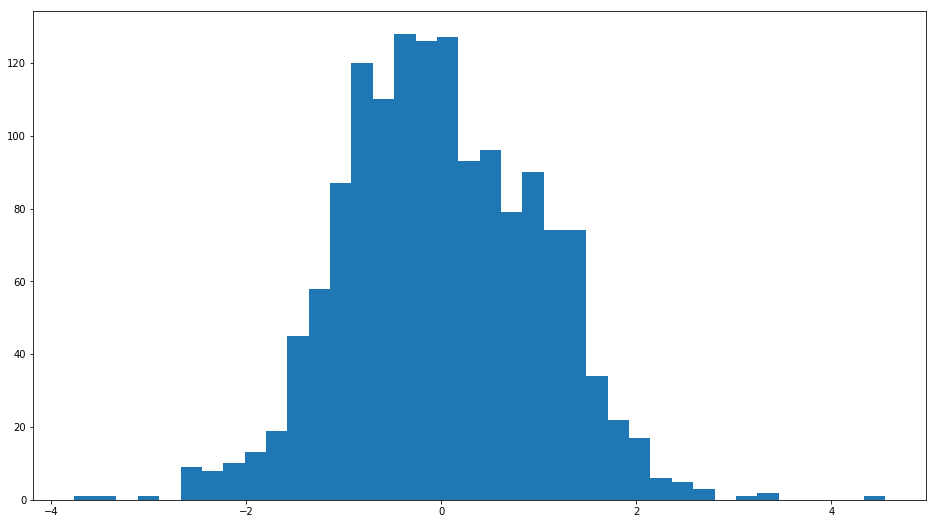

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.hist(features['1stFlrSF'], bins=n_bins)

In [18]:
model = DBSCAN(eps=4, min_samples=10).fit(features)
Counter(model.labels_)

Counter({-1: 10, 0: 1450})

In [19]:
train_data = pd.concat([features, sale_price], axis=1)
train_data = train_data[model.labels_==0]

(array([   1.,    0.,    1.,    7.,    1.,   12.,    6.,   25.,   20.,
          38.,   62.,   81.,  117.,  108.,  121.,  118.,  121.,   95.,
          89.,   74.,   92.,   66.,   86.,   44.,   18.,   21.,   13.,
           4.,    4.,    1.,    1.,    1.,    1.,    0.,    0.,    0.,
           0.,    1.]),
 array([-3.42735368, -3.21734526, -3.00733684, -2.79732842, -2.58732   ,
        -2.37731158, -2.16730316, -1.95729474, -1.74728632, -1.5372779 ,
        -1.32726948, -1.11726106, -0.90725264, -0.69724422, -0.4872358 ,
        -0.27722738, -0.06721896,  0.14278947,  0.35279789,  0.56280631,
         0.77281473,  0.98282315,  1.19283157,  1.40283999,  1.61284841,
         1.82285683,  2.03286525,  2.24287367,  2.45288209,  2.66289051,
         2.87289893,  3.08290735,  3.29291577,  3.50292419,  3.71293261,
         3.92294103,  4.13294945,  4.34295787,  4.55296629]),
 <a list of 38 Patch objects>)

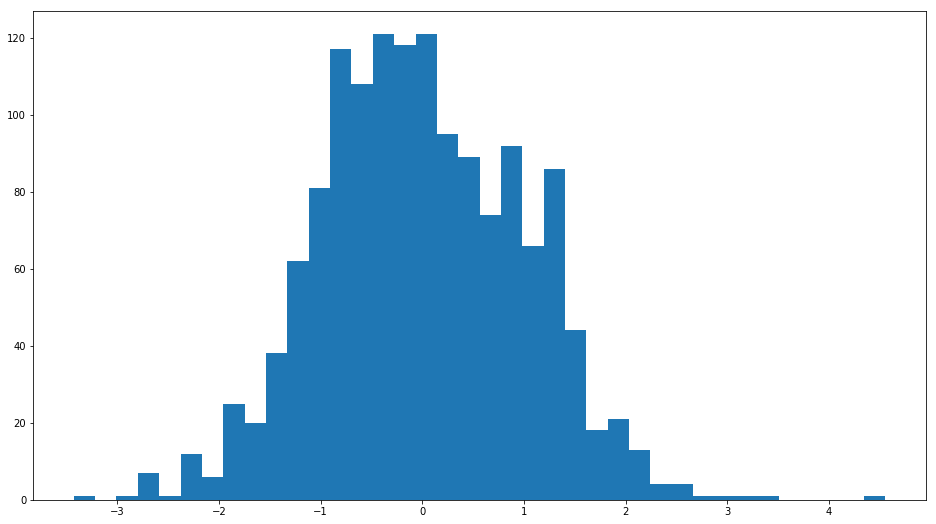

In [20]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.hist(train_data['1stFlrSF'], bins=n_bins)

In [21]:
def delete_outliers(data, col_name):
    col_mean = np.mean(data[col_name])
    col_std = np.std(data[col_name])
    data = data[data[col_name] > (col_mean - 3 * col_std)]
    data = data[data[col_name] < (col_mean + 3 * col_std)]
    return data

In [22]:
train_data_col_names = train_data.columns.drop('SalePrice')
for col_name in train_data_col_names:
    train_data = delete_outliers(train_data, col_name)

(array([   8.,    6.,    6.,    5.,   17.,   17.,   28.,   36.,   59.,
          77.,   91.,   84.,  102.,   89.,   93.,   90.,   77.,   68.,
          64.,   74.,   67.,   58.,   57.,   30.,   15.,   18.,   11.,
           3.,    3.,    3.]),
 array([-2.60524542, -2.4272702 , -2.24929498, -2.07131975, -1.89334453,
        -1.7153693 , -1.53739408, -1.35941886, -1.18144363, -1.00346841,
        -0.82549319, -0.64751796, -0.46954274, -0.29156752, -0.11359229,
         0.06438293,  0.24235816,  0.42033338,  0.5983086 ,  0.77628383,
         0.95425905,  1.13223427,  1.3102095 ,  1.48818472,  1.66615995,
         1.84413517,  2.02211039,  2.20008562,  2.37806084,  2.55603606,
         2.73401129]),
 <a list of 30 Patch objects>)

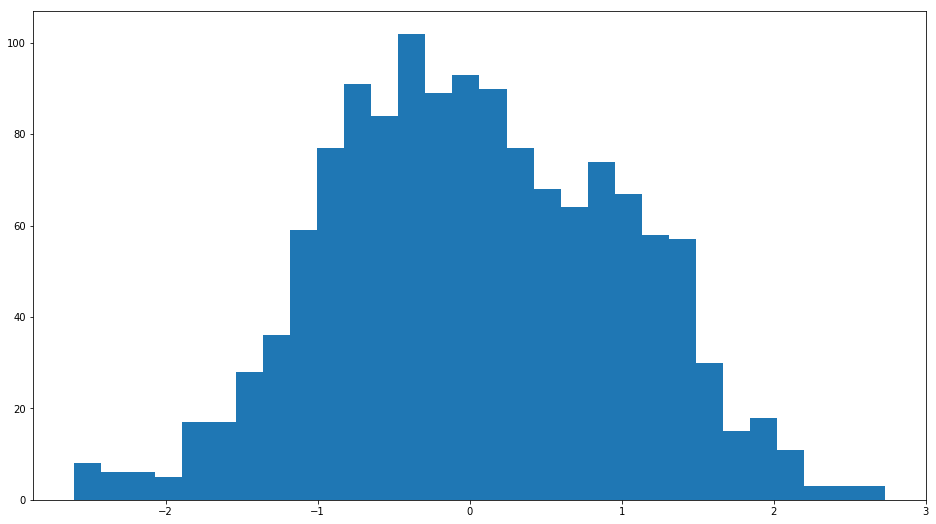

In [23]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.hist(train_data['1stFlrSF'], bins=30)

In [24]:
train_data.head()

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
0,0.684492,0.529259,0.303696,-0.803571,0.624613,1.045177,0.877540,208500
1,0.045276,-0.381847,0.233357,0.418584,0.624613,0.163448,-0.424183,181500
2,0.684492,0.659674,0.345445,-0.576561,0.624613,0.980273,0.829642,223500
3,0.684492,0.541511,0.367310,-0.439289,-0.678165,-1.873795,-0.715870,140000
4,1.238321,1.282192,0.473408,0.112266,0.624613,0.947796,0.733774,250000


In [25]:
print('After processing data and removing outliers, the number of samples')
print(
    'got reduced from {} to {} which is {:.2f}% of the initial dataset'.format(
        n_samples, len(train_data), (1 - len(train_data)/n_samples) * 100
    )
)

After processing data and removing outliers, the number of samples
got reduced from 1460 to 1356 which is 7.12% of the initial dataset


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data.drop('SalePrice', axis=1),
    train_data['SalePrice'],
    test_size=0.25
)

In [28]:
from sklearn.svm import SVR

In [29]:
regressor = SVR()
regressor.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = regressor.predict(x_test)
y_pred = [int(pred + 0.5) for pred in y_pred]

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn_model= KNeighborsRegressor()

knn_model.fit(x_train, y_train)
knn_train_pred = knn_model.predict(x_train)
knn_pred = np.expm1(knn_model.predict(x_test))

In [33]:
def rmse(a, b):
    diff = a - b
    num_of_samples = len(diff)
    sum_eq = sum(diff ** 2)
    return np.sqrt(sum_eq / num_of_samples)

print('train score = ', knn_model.score(x_train, y_train))
print('train rmse = ', rmse(y_train, knn_train_pred))

train score =  0.897002246455
train rmse =  25122.8934397


In [34]:
print('test score = ', knn_model.score(x_test, y_test))

test score =  0.83763111585


In [43]:
np.sqrt(sum((y_pred-y_test.values)**2))

32521.395673779869